In [1]:
#!pip install geonamescache
import tweepy
import numpy
import pandas as pd
import requests
from bs4 import BeautifulSoup
import importlib
import json
from helper import *
from selenium import webdriver
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn import linear_model


In [2]:
pd.options.display.max_columns = 200

## First Impressions

In [3]:
df=pd.read_csv("out.csv")
df=pd.concat([df,pd.read_csv("out2.csv"),pd.read_csv("out3.csv"),pd.read_csv("out4.csv"),pd.read_csv("out5.csv"),pd.read_csv("out6.csv")])
df

,Unnamed: 0,name,age,city,country,gender,acount age,total tweets,followers,following,respectability,verified,text,views,likes,retweets,quote retweets,comments,word count,is quote,hashtags,hashtag count,trending,using trends?,link to tweet
0,0,CamuyArenas_AA,NaN,Puente,United States,NaN,3.2,228,50,22,0.440000,False,Just posted a photo @ Estadio Juan F.Cheo Lópe...,13,0,0,0,0,11,False,NaN,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/CamuyArenas_AA/status/...
1,1,16p11dot2ds,NaN,Georgia,United States,NaN,4.9,32312,33,481,14.575758,False,This is a prep free zone. https://t.co/2qqlLxy...,336,1,0,0,1,8,True,NaN,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/16p11dot2ds/status/161...
2,2,PoopScoopSF,NaN,Downtown,United States,NaN,4.7,163626,415,125,0.301205,False,"""Big poop front of our door."" (Downtown, D3) h...",9,0,0,0,1,10,False,NaN,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/PoopScoopSF/status/161...
3,3,wchazz,NaN,Wesley Chapel,United States,NaN,15.4,48876,377,951,2.522546,False,"2nd cardio, target calories 1k @ Wesley Chapel...",4,0,0,0,0,10,False,NaN,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/wchazz/status/16139885...
4,4,wyatthebson,NaN,Pier 17,United States,NaN,16.8,24061,1366,4999,3.659590,False,Listen to PODCAST #6 SGUZR by Core Beats on Tn...,13,0,0,0,0,11,False,NaN,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/wyatthebson/status/161...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9348,9348,arshadzackeriya,NaN,Wellington City,New Zealand,NaN,14.0,1022,289,482,1.667820,False,Stay tuned; the first podcast of 2023 will lau...,138,7,0,0,0,26,False,"['DevOps', 'DevOpswithZack']",2,"['Paula', 'Chargers', 'Paul Henry', '#UFCVegas...",False,https://www.twitter.com/arshadzackeriya/status...
9349,9349,Ncookie98,NaN,Auckland,New Zealand,NaN,11.3,133568,121,516,4.264463,False,ถ้าปัดทินเดอร์ไปก็คงไม่เจอน้องหรอก เพราะน่าจะอ...,5,0,0,0,0,2,False,NaN,0,"['Paula', 'Chargers', 'Paul Henry', 'Perth', '...",False,https://www.twitter.com/Ncookie98/status/16138...
9350,9350,erimedi,NaN,Christchurch City,New Zealand,NaN,8.0,10015,190,376,1.978947,False,Irish pub in New Zealand and they’re playing c...,65,2,0,0,0,11,False,NaN,0,"['Paula', 'Chargers', 'Paul Henry', '#UFCVegas...",True,https://www.twitter.com/erimedi/status/1613849...
9351,9351,auralorgasm,NaN,Kapiti Coast District,New Zealand,NaN,9.8,56050,490,412,0.840816,False,Absolute parody account https://t.co/NzZ2gjb3JU,39,1,0,0,0,4,True,NaN,0,"['Paula', 'Chargers', 'Paul Henry', '#UFCVegas...",False,https://www.twitter.com/auralorgasm/status/161...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48770 entries, 0 to 9352
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      48770 non-null  int64  
 1   name            48770 non-null  object 
 2   age             624 non-null    float64
 3   city            48770 non-null  object 
 4   country         48770 non-null  object 
 5   gender          0 non-null      float64
 6   acount age      48770 non-null  float64
 7   total tweets    48770 non-null  int64  
 8   followers       48770 non-null  int64  
 9   following       48770 non-null  int64  
 10  respectability  48770 non-null  float64
 11  verified        48770 non-null  bool   
 12  text            48770 non-null  object 
 13  views           48770 non-null  int64  
 14  likes           48770 non-null  int64  
 15  retweets        48770 non-null  int64  
 16  quote retweets  48770 non-null  int64  
 17  comments        48770 non-null  

as we can see, age and gender are almost completely comprised NaN

In [5]:
df=df.drop(["age", "gender",'Unnamed: 0'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48770 entries, 0 to 9352
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            48770 non-null  object 
 1   city            48770 non-null  object 
 2   country         48770 non-null  object 
 3   acount age      48770 non-null  float64
 4   total tweets    48770 non-null  int64  
 5   followers       48770 non-null  int64  
 6   following       48770 non-null  int64  
 7   respectability  48770 non-null  float64
 8   verified        48770 non-null  bool   
 9   text            48770 non-null  object 
 10  views           48770 non-null  int64  
 11  likes           48770 non-null  int64  
 12  retweets        48770 non-null  int64  
 13  quote retweets  48770 non-null  int64  
 14  comments        48770 non-null  int64  
 15  word count      48770 non-null  int64  
 16  is quote        48770 non-null  bool   
 17  hashtags        11594 non-null  

In [7]:
df.describe(include='all')

,name,city,country,acount age,total tweets,followers,following,respectability,verified,text,views,likes,retweets,quote retweets,comments,word count,is quote,hashtags,hashtag count,trending,using trends?,link to tweet
count,48770,48770,48770,48770.000000,4.877000e+04,4.877000e+04,48770.000000,48770.000000,48770,48770,4.877000e+04,48770.000000,48770.000000,48770.000000,48770.000000,48770.000000,48770,11594,48770.000000,48770,48770,48770
unique,23825,5721,5,NaN,NaN,NaN,NaN,NaN,2,40335,NaN,NaN,NaN,NaN,NaN,NaN,2,7453,NaN,500,2,40431
top,KaimoanaVaitoh6,Auckland,United States,NaN,NaN,NaN,NaN,NaN,False,Streaming https://t.co/XvJo1bLBSq,NaN,NaN,NaN,NaN,NaN,NaN,False,['TOTP'],NaN,"['#BBCLauraK', '#sundayvibes', '#INDvSL', '#Su...",False,https://www.twitter.com/KaimoanaVaitoh6/status...
freq,409,3632,10597,NaN,NaN,NaN,NaN,NaN,47445,7,NaN,NaN,NaN,NaN,NaN,NaN,36773,101,NaN,1597,46039,5
mean,NaN,NaN,NaN,10.321605,6.539100e+04,5.864259e+03,1561.339532,2.046765,NaN,NaN,1.201250e+03,14.522186,1.912385,0.165019,1.147058,15.703363,NaN,NaN,0.581320,NaN,NaN,NaN
std,NaN,NaN,NaN,4.690969,7.337450e+05,1.150472e+05,7158.727971,4.932596,NaN,NaN,1.372774e+04,230.981068,35.538538,3.096637,19.475611,12.490529,NaN,NaN,1.610394,NaN,NaN,NaN
min,NaN,NaN,NaN,0.100000,1.000000e+00,0.000000e+00,0.000000,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,5.800000,2.894000e+03,2.330000e+02,256.000000,0.547652,NaN,NaN,3.700000e+01,0.000000,0.000000,0.000000,0.000000,7.000000,NaN,NaN,0.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,11.600000,1.211900e+04,6.530000e+02,655.000000,1.097918,NaN,NaN,1.150000e+02,1.000000,0.000000,0.000000,0.000000,12.000000,NaN,NaN,0.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,14.300000,3.725100e+04,1.847000e+03,1553.000000,2.149742,NaN,NaN,3.870000e+02,4.000000,0.000000,0.000000,0.000000,21.000000,NaN,NaN,0.000000,NaN,NaN,NaN


In [8]:
df['country'].value_counts()

United States     10597
United Kingdom     9587
Australia          9585
New Zealand        9546
Canada             9455
Name: country, dtype: int64

<AxesSubplot:ylabel='country'>

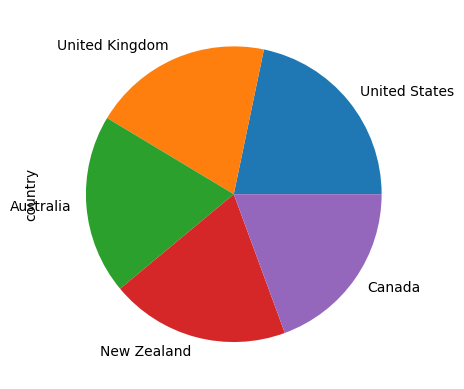

In [9]:
df['country'].value_counts().plot(kind='pie')

In [10]:
df['country'].value_counts(normalize=True)

United States     0.217285
United Kingdom    0.196576
Australia         0.196535
New Zealand       0.195735
Canada            0.193869
Name: country, dtype: float64

In [11]:
df[df['name'].duplicated()]

,name,city,country,acount age,total tweets,followers,following,respectability,verified,text,views,likes,retweets,quote retweets,comments,word count,is quote,hashtags,hashtag count,trending,using trends?,link to tweet
57,findsfromyester,Denton,United States,12.2,1062969,34362,30571,0.889675,False,Check out this item in my Etsy shop https://t....,3,0,0,0,0,9,False,NaN,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/findsfromyester/status...
74,findsfromyester,Denton,United States,12.2,1062969,34362,30571,0.889675,False,Check out this item in my Etsy shop https://t....,2,0,0,0,0,9,False,NaN,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/findsfromyester/status...
91,findsfromyester,Denton,United States,12.2,1062969,34362,30571,0.889675,False,Check out this item in my Etsy shop https://t....,3,0,0,0,0,9,False,NaN,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/findsfromyester/status...
107,findsfromyester,Denton,United States,12.2,1062969,34362,30571,0.889675,False,Check out this item in my Etsy shop https://t....,2,0,0,0,0,9,False,NaN,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/findsfromyester/status...
123,ApartmentCareer,Nashville,United States,15.0,111303,4117,3962,0.962351,False,Now Hiring: Apartment Maintenance Supervisor -...,8,0,0,0,0,18,False,['jobs'],1,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/ApartmentCareer/status...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9348,arshadzackeriya,Wellington City,New Zealand,14.0,1022,289,482,1.667820,False,Stay tuned; the first podcast of 2023 will lau...,138,7,0,0,0,26,False,"['DevOps', 'DevOpswithZack']",2,"['Paula', 'Chargers', 'Paul Henry', '#UFCVegas...",False,https://www.twitter.com/arshadzackeriya/status...
9349,Ncookie98,Auckland,New Zealand,11.3,133568,121,516,4.264463,False,ถ้าปัดทินเดอร์ไปก็คงไม่เจอน้องหรอก เพราะน่าจะอ...,5,0,0,0,0,2,False,NaN,0,"['Paula', 'Chargers', 'Paul Henry', 'Perth', '...",False,https://www.twitter.com/Ncookie98/status/16138...
9350,erimedi,Christchurch City,New Zealand,8.0,10015,190,376,1.978947,False,Irish pub in New Zealand and they’re playing c...,65,2,0,0,0,11,False,NaN,0,"['Paula', 'Chargers', 'Paul Henry', '#UFCVegas...",True,https://www.twitter.com/erimedi/status/1613849...
9351,auralorgasm,Kapiti Coast District,New Zealand,9.8,56050,490,412,0.840816,False,Absolute parody account https://t.co/NzZ2gjb3JU,39,1,0,0,0,4,True,NaN,0,"['Paula', 'Chargers', 'Paul Henry', '#UFCVegas...",False,https://www.twitter.com/auralorgasm/status/161...


### delete dups
as we know, bots are very common on social medias, and twitter is no different.
when we extracted the tweets, we asked the twitter api to retrieve us all the tweeets that were tweeted in the last 2-5 minutes(back when we extracted them)
so that means that if we see a duplicate name, that means that it's either a person that tweeted more than once in the span of 5 minutes which isn't that common. so when we catch a duplicate name, we will assume it's a bot

In [12]:
df = pd.read_csv("out.csv")
dfl = [df,pd.read_csv("out2.csv"),pd.read_csv("out3.csv"),pd.read_csv("out4.csv"),pd.read_csv("out5.csv"),pd.read_csv("out6.csv")]

for i in range(0,6):
    dfl[i].drop(["age", "gender",'Unnamed: 0'], axis=1,inplace=True)
    dfl[i].drop_duplicates(subset= 'name' ,keep = False, inplace=True)

dfn = pd.concat(dfl,ignore_index=True)

dfn[dfn.duplicated('name')].shape[0]

4368

almost half of the data frame was removed, but 25,000 rows is still enough for us, so we will continue 

now that our data is far more reliable let's
# Analyze the data
we want to see what variables are affecting the amount of retweets
### but first let's remove everything we don't need for the analysis

In [13]:
df = dfn.drop(['name','text','quote retweets','following','respectability','trending', 'link to tweet','hashtags'], axis = 1)
#df.drop('name',axis = 1,inplace = True)

column_to_move = df.pop("retweets")
df.insert(df.shape[1], "retweets", column_to_move)
df.reset_index(drop = True, inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25420 entries, 0 to 25419
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   city           25420 non-null  object 
 1   country        25420 non-null  object 
 2   acount age     25420 non-null  float64
 3   total tweets   25420 non-null  int64  
 4   followers      25420 non-null  int64  
 5   verified       25420 non-null  bool   
 6   views          25420 non-null  int64  
 7   likes          25420 non-null  int64  
 8   comments       25420 non-null  int64  
 9   word count     25420 non-null  int64  
 10  is quote       25420 non-null  bool   
 11  hashtag count  25420 non-null  int64  
 12  using trends?  25420 non-null  bool   
 13  retweets       25420 non-null  int64  
dtypes: bool(3), float64(1), int64(8), object(2)
memory usage: 2.2+ MB


In [15]:
df.describe(include='all')

,city,country,acount age,total tweets,followers,verified,views,likes,comments,word count,is quote,hashtag count,using trends?,retweets
count,25420,25420,25420.000000,2.542000e+04,2.542000e+04,25420,2.542000e+04,25420.000000,25420.000000,25420.000000,25420,25420.000000,25420,25420.000000
unique,5120,5,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2,NaN,2,NaN
top,Melbourne,United States,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,False,NaN
freq,997,7707,NaN,NaN,NaN,24615,NaN,NaN,NaN,NaN,19344,NaN,24188,NaN
mean,NaN,NaN,10.633836,3.304289e+04,4.763564e+03,NaN,1.419548e+03,16.359127,1.275059,16.396341,NaN,0.678245,NaN,2.004485
std,NaN,NaN,4.466856,7.315972e+05,9.619805e+04,NaN,1.683446e+04,252.815631,24.858389,12.724849,NaN,1.828168,NaN,40.334819
min,NaN,NaN,0.100000,1.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000,0.000000,1.000000,NaN,0.000000,NaN,0.000000
25%,NaN,NaN,6.900000,2.028750e+03,2.120000e+02,NaN,4.600000e+01,0.000000,0.000000,7.000000,NaN,0.000000,NaN,0.000000
50%,NaN,NaN,11.900000,7.516500e+03,5.840000e+02,NaN,1.410000e+02,1.000000,0.000000,12.000000,NaN,0.000000,NaN,0.000000
75%,NaN,NaN,14.300000,2.277325e+04,1.621250e+03,NaN,4.620000e+02,5.000000,1.000000,23.000000,NaN,1.000000,NaN,0.000000


In [16]:
df['retweets'].value_counts()

0       20142
1        2582
2         889
3         457
4         268
        ...  
4826        1
55          1
80          1
420         1
77          1
Name: retweets, Length: 134, dtype: int64

In [17]:
df[df['retweets'] > 1000].retweets.sort_values(kind = 'quicksort' )

9398     1033
19389    1125
20771    1467
22163    2028
7875     4826
Name: retweets, dtype: int64

looks like we have some outliers, let's remove them

In [18]:
df = df[df['retweets'] < 1750]

lets also convert all of the categorical data to numerical 

In [19]:
df = df.copy()
for c in ['city','country','verified','is quote','using trends?']:
    df[c] = df[c].astype('category')
    df[c] = df[c].cat.codes 

#### now lets try to find which factors are impotant when trying to know how many retweets a tweet will get

In [20]:
df.corr()

,city,country,acount age,total tweets,followers,verified,views,likes,comments,word count,is quote,hashtag count,using trends?,retweets
city,1.000000,-0.105194,0.012671,0.006928,0.007075,0.003349,0.001116,-0.000662,-0.003025,0.015921,0.005329,0.005889,-0.000252,0.001341
country,-0.105194,1.000000,0.008859,0.023344,0.001770,-0.007616,0.006275,0.006052,0.009536,-0.004431,0.048715,-0.056077,-0.018405,-0.000383
acount age,0.012671,0.008859,1.000000,0.016038,0.036189,0.110349,0.005416,-0.005934,-0.001248,0.014624,0.046967,-0.034932,0.030520,-0.007979
total tweets,0.006928,0.023344,0.016038,1.000000,0.001211,0.000918,-0.000727,-0.000844,-0.000400,-0.017371,-0.003578,-0.008226,-0.002864,-0.001138
followers,0.007075,0.001770,0.036189,0.001211,1.000000,0.147239,0.104543,0.056642,0.038925,0.002560,-0.007460,-0.002604,-0.004427,0.036118
verified,0.003349,-0.007616,0.110349,0.000918,0.147239,1.000000,0.111875,0.083314,0.065401,0.046278,0.027852,-0.000516,-0.009389,0.064890
views,0.001116,0.006275,0.005416,-0.000727,0.104543,0.111875,1.000000,0.863751,0.647494,0.021025,-0.000062,-0.009122,-0.007361,0.772564
likes,-0.000662,0.006052,-0.005934,-0.000844,0.056642,0.083314,0.863751,1.000000,0.750846,0.018823,-0.012747,-0.004286,-0.008747,0.822642
comments,-0.003025,0.009536,-0.001248,-0.000400,0.038925,0.065401,0.647494,0.750846,1.000000,0.026422,-0.014861,-0.004099,-0.005062,0.594196
word count,0.015921,-0.004431,0.014624,-0.017371,0.002560,0.046278,0.021025,0.018823,0.026422,1.000000,-0.109375,0.167023,0.037181,0.044075


4    7707
3    6415
1    4887
0    4381
2    2028
Name: country, dtype: int64


<AxesSubplot:ylabel='country'>

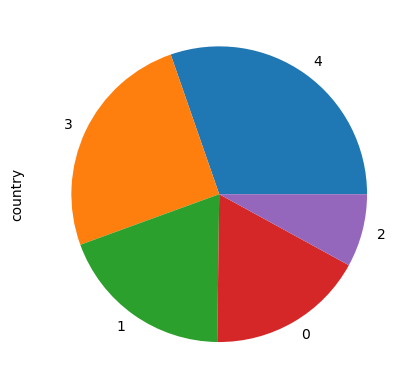

In [21]:
cvc = df.country.value_counts()
print(cvc)
cvc.plot(kind='pie')

us 0
canada 0
uk 0
au 0
nz 0
all 44100


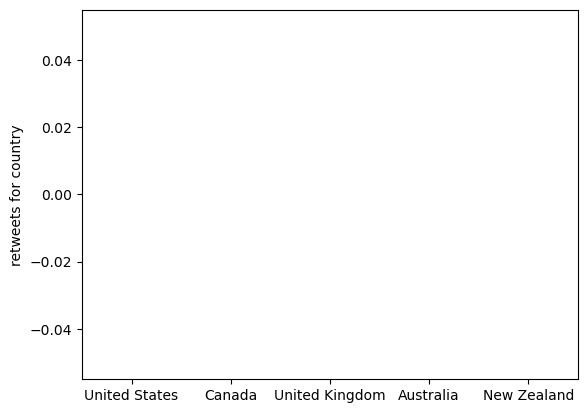

In [22]:
sns.barplot(x = ['United States','Canada','United Kingdom','Australia','New Zealand'],
        y = [df[df.country == 'United States'].retweets.sum(),
            df[df.country == 'Canada'].retweets.sum(),
            df[df.country == 'United Kingdom'].retweets.sum(),
            df[df.country == 'Australia'].retweets.sum(),
            df[df.country == 'New Zealand'].retweets.sum()])
plt.ylabel('retweets for country')


print('us',df[df.country == 'United States'].retweets.sum())
print('canada',df[df.country == 'Canada'].retweets.sum())
print('uk',df[df.country == 'United Kingdom'].retweets.sum())
print('au',df[df.country == 'Australia'].retweets.sum())
print('nz',df[df.country == 'New Zealand'].retweets.sum())
print('all', df.retweets.sum())

looks like the country from which the tweet came has some effect on the retweet count
this shows that the country of origin is a valid factor

<BarContainer object of 25418 artists>

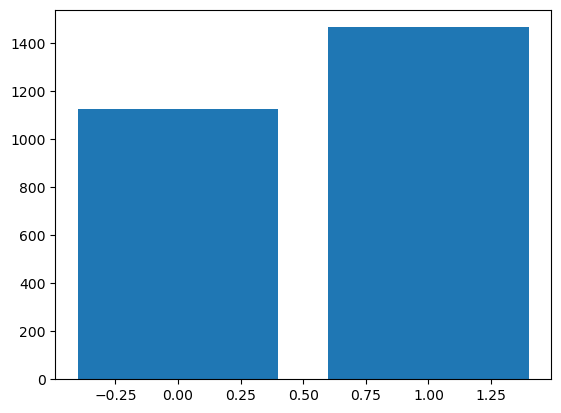

In [23]:
plt.bar(df.verified,df.retweets)

it's not a secret that on twitter the "verification bedge" is a status symbol that is mostly reserved for the famouse and popular.
the result we got here is strange since it shows that there's almost no difference, but this is probobly the result of not enogh data.

despite what we are seeing here, we will concider this valid

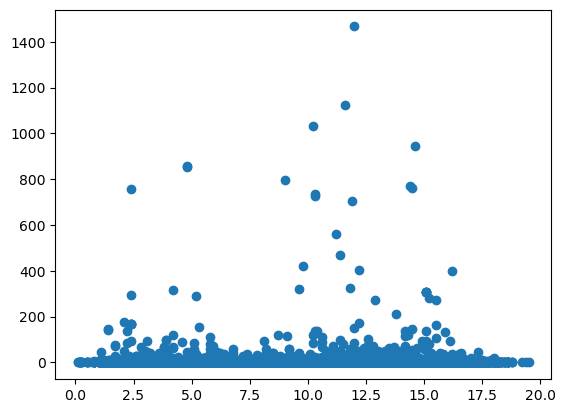

In [24]:
plt.scatter(df['acount age'],df['retweets'])

account age has no correlation to the amount of retweets.
not valid

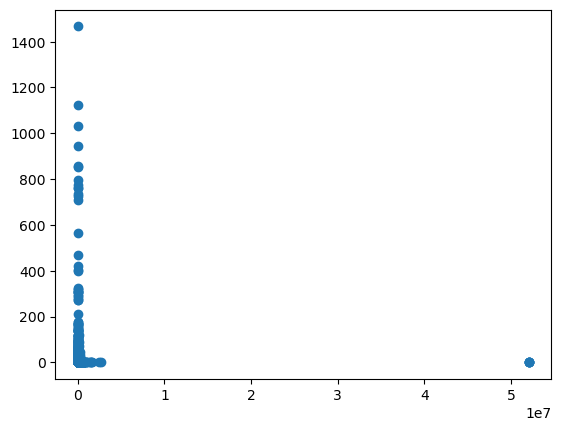

In [25]:
plt.scatter(df['total tweets'],df['retweets'])

also, no correlation

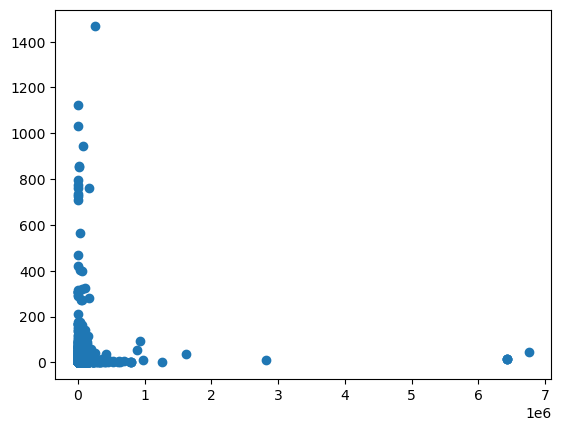

In [26]:
plt.scatter(x = df['followers'],y = df['retweets'])

although its abvious that follower count should have a direct correlation with retweet count, it apears that the data we collected wasn't good enough in that department.
unfortunaly we will have to skip

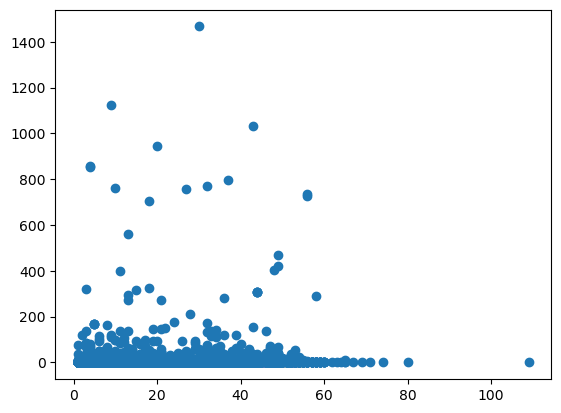

In [27]:
plt.scatter(df['word count'],df['retweets'])

no correlation

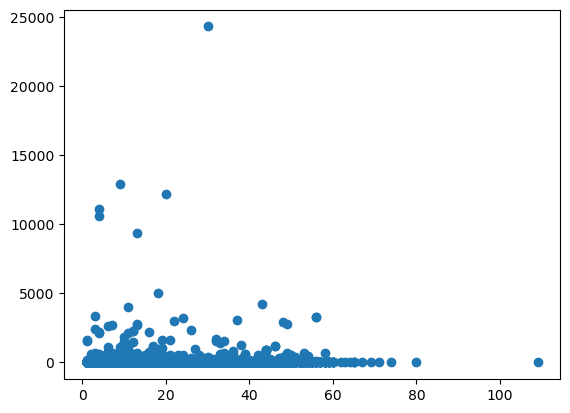

In [28]:
plt.scatter(df['word count'],df['likes'])

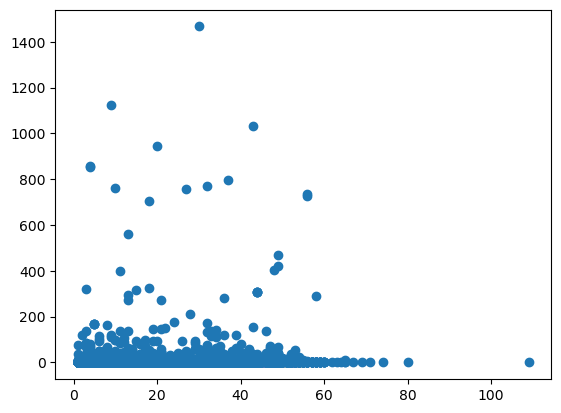

In [29]:
plt.scatter(df['word count'],df['retweets'])

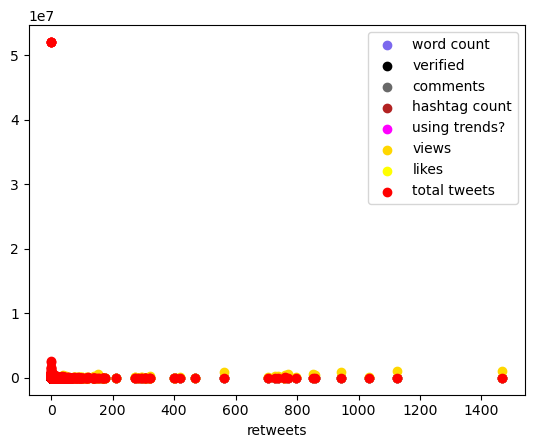

In [30]:
plt.scatter(y = df['word count'],    x = df['retweets'],c = 'mediumslateblue',label = 'word count');
plt.scatter(y = df['verified'],      x = df['retweets'],c = 'black',label = 'verified');
plt.scatter(y = df['comments'],      x = df['retweets'],c = 'dimgray',label = 'comments');
plt.scatter(y = df['hashtag count'], x = df['retweets'],c = 'firebrick',label = 'hashtag count');
plt.scatter(y = df['using trends?'], x = df['retweets'],c = 'fuchsia',label = 'using trends?');
plt.scatter(y = df['views'],         x = df['retweets'],c = 'gold',label = 'views');
plt.scatter(y = df['likes'],         x = df['retweets'],c = 'yellow',label = 'likes');
plt.scatter(y = df['total tweets'],  x = df['retweets'],c = 'red',label = 'total tweets');
#plt.scatter(y = df['quote retweets'],x = df['retweets'],c = 'lightseagreen',label = 'quote retweets');

plt.legend(numpoints = 10, loc = 0)
plt.xlabel('retweets')

plt.show()

In [31]:
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [32]:
df.reset_index(drop = True, inplace = True)
df.head()

,city,country,acount age,total tweets,followers,verified,views,likes,comments,word count,is quote,hashtag count,using trends?,retweets
0,3595,4,3.2,228,50,0,13,0,0,11,0,0,0,0
1,1710,4,4.9,32312,33,0,336,1,1,8,1,0,0,0
2,1272,4,4.7,163626,415,0,9,0,1,10,0,0,0,0
3,4365,4,7.7,34240,772,0,50,0,0,24,0,0,0,0
4,270,4,14.5,4599,1966,0,28,1,0,34,0,0,0,0


In [45]:
#nm = ['total tweets',"verified","comments","word count","hashtag count","views","likes",'using trends?']
nm = ["verified","comments","hashtag count","views","likes",'using trends?']
models = []

for i in range(0,len(nm)):
    models.append(linear_model.LinearRegression().fit(df[[nm[i]]],df['retweets']))
    print("b1:",models[i].coef_)
    print("b0:",models[i].intercept_)
    print()

b1: [8.69424673]
b0: 1.459982123994475

b1: [0.57072023]
b0: 1.0301117293861233

b1: [0.15829283]
b0: 1.627652245954713

b1: [0.00108059]
b0: 0.21371930024013963

b1: [0.0789867]
b0: 0.483096203970963

b1: [0.49176686]
b0: 1.7111552137600265



In [46]:
def see(Y,Y_H):
    see=sum([(y-y_h)**2 for y,y_h in zip(Y,Y_H)])
    return see

SSEs = []
for i in range(0,len(nm)):
    SSEs.append(see(df.retweets.tolist(),models[i].predict(df[[nm[i]]]).flatten()))

In [47]:
SSEs

[13917822.958017362,
 9041938.793637754,
 13974546.383492082,
 5634625.935149543,
 4518094.757696271,
 13976391.39980788]

In [48]:
from sklearn.metrics import r2_score

for i in range(0,len(nm)): 
    print(nm[i],r2_score(df.retweets.tolist(),models[i].predict(df[[nm[i]]]).flatten()))

verified 0.004210725473617449
comments 0.35306939175847607
hashtag count 0.00015229055331478225
views 0.5968550477243022
likes 0.6767403699141689
using trends? 2.028374031159963e-05


### While some of these are fine, we can achieve better results with multiple linear regression

In [49]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

x = df.drop('retweets',axis = 1)
y = df['retweets']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state = 0)

lr = linear_model.LinearRegression() # create a linear regression object
lr.fit(x_train, y_train);

y_pred_train = lr.predict(x_train)
r2_score(y_train,y_pred_train)

0.7498773733423179

after some testing, it apeard that some random states gave us better results, so will se which one gives us the best

In [50]:
max_i = 0
max_r = 0

for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    
    lr = linear_model.LinearRegression() # create a linear regression object
    lr.fit(x_train, y_train);
    
    y_pred_train = lr.predict(x_train)
    
    if r2_score(y_train,y_pred_train) > max_r:
        max_i = i
        max_r = r2_score(y_train,y_pred_train)

print(max_i,max_r)

905 0.8211027407145501


In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3 , random_state = 905)

lr = linear_model.LinearRegression() # create a linear regression object
lr.fit(x_train, y_train);

y_pred_train = lr.predict(x_train)
r2_score(y_train,y_pred_train)

0.8211027407145501

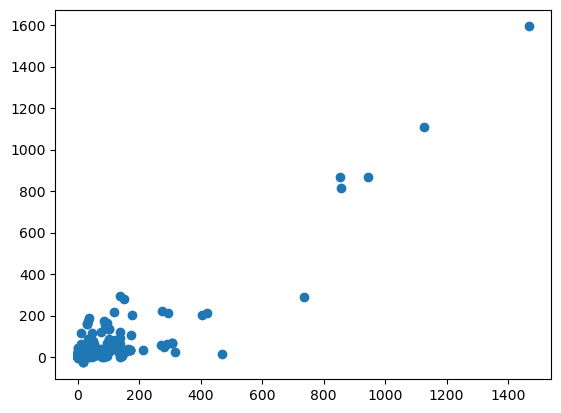

In [52]:
plt.scatter(y_train,y_pred_train)

                   city   country  acount age  total tweets  followers  \
city           1.000000 -0.105194    0.012671      0.006928   0.007075   
country       -0.105194  1.000000    0.008859      0.023344   0.001770   
acount age     0.012671  0.008859    1.000000      0.016038   0.036189   
total tweets   0.006928  0.023344    0.016038      1.000000   0.001211   
followers      0.007075  0.001770    0.036189      0.001211   1.000000   
verified       0.003349 -0.007616    0.110349      0.000918   0.147239   
views          0.001116  0.006275    0.005416     -0.000727   0.104543   
likes         -0.000662  0.006052   -0.005934     -0.000844   0.056642   
comments      -0.003025  0.009536   -0.001248     -0.000400   0.038925   
word count     0.015921 -0.004431    0.014624     -0.017371   0.002560   
is quote       0.005329  0.048715    0.046967     -0.003578  -0.007460   
hashtag count  0.005889 -0.056077   -0.034932     -0.008226  -0.002604   
using trends? -0.000252 -0.018405    0

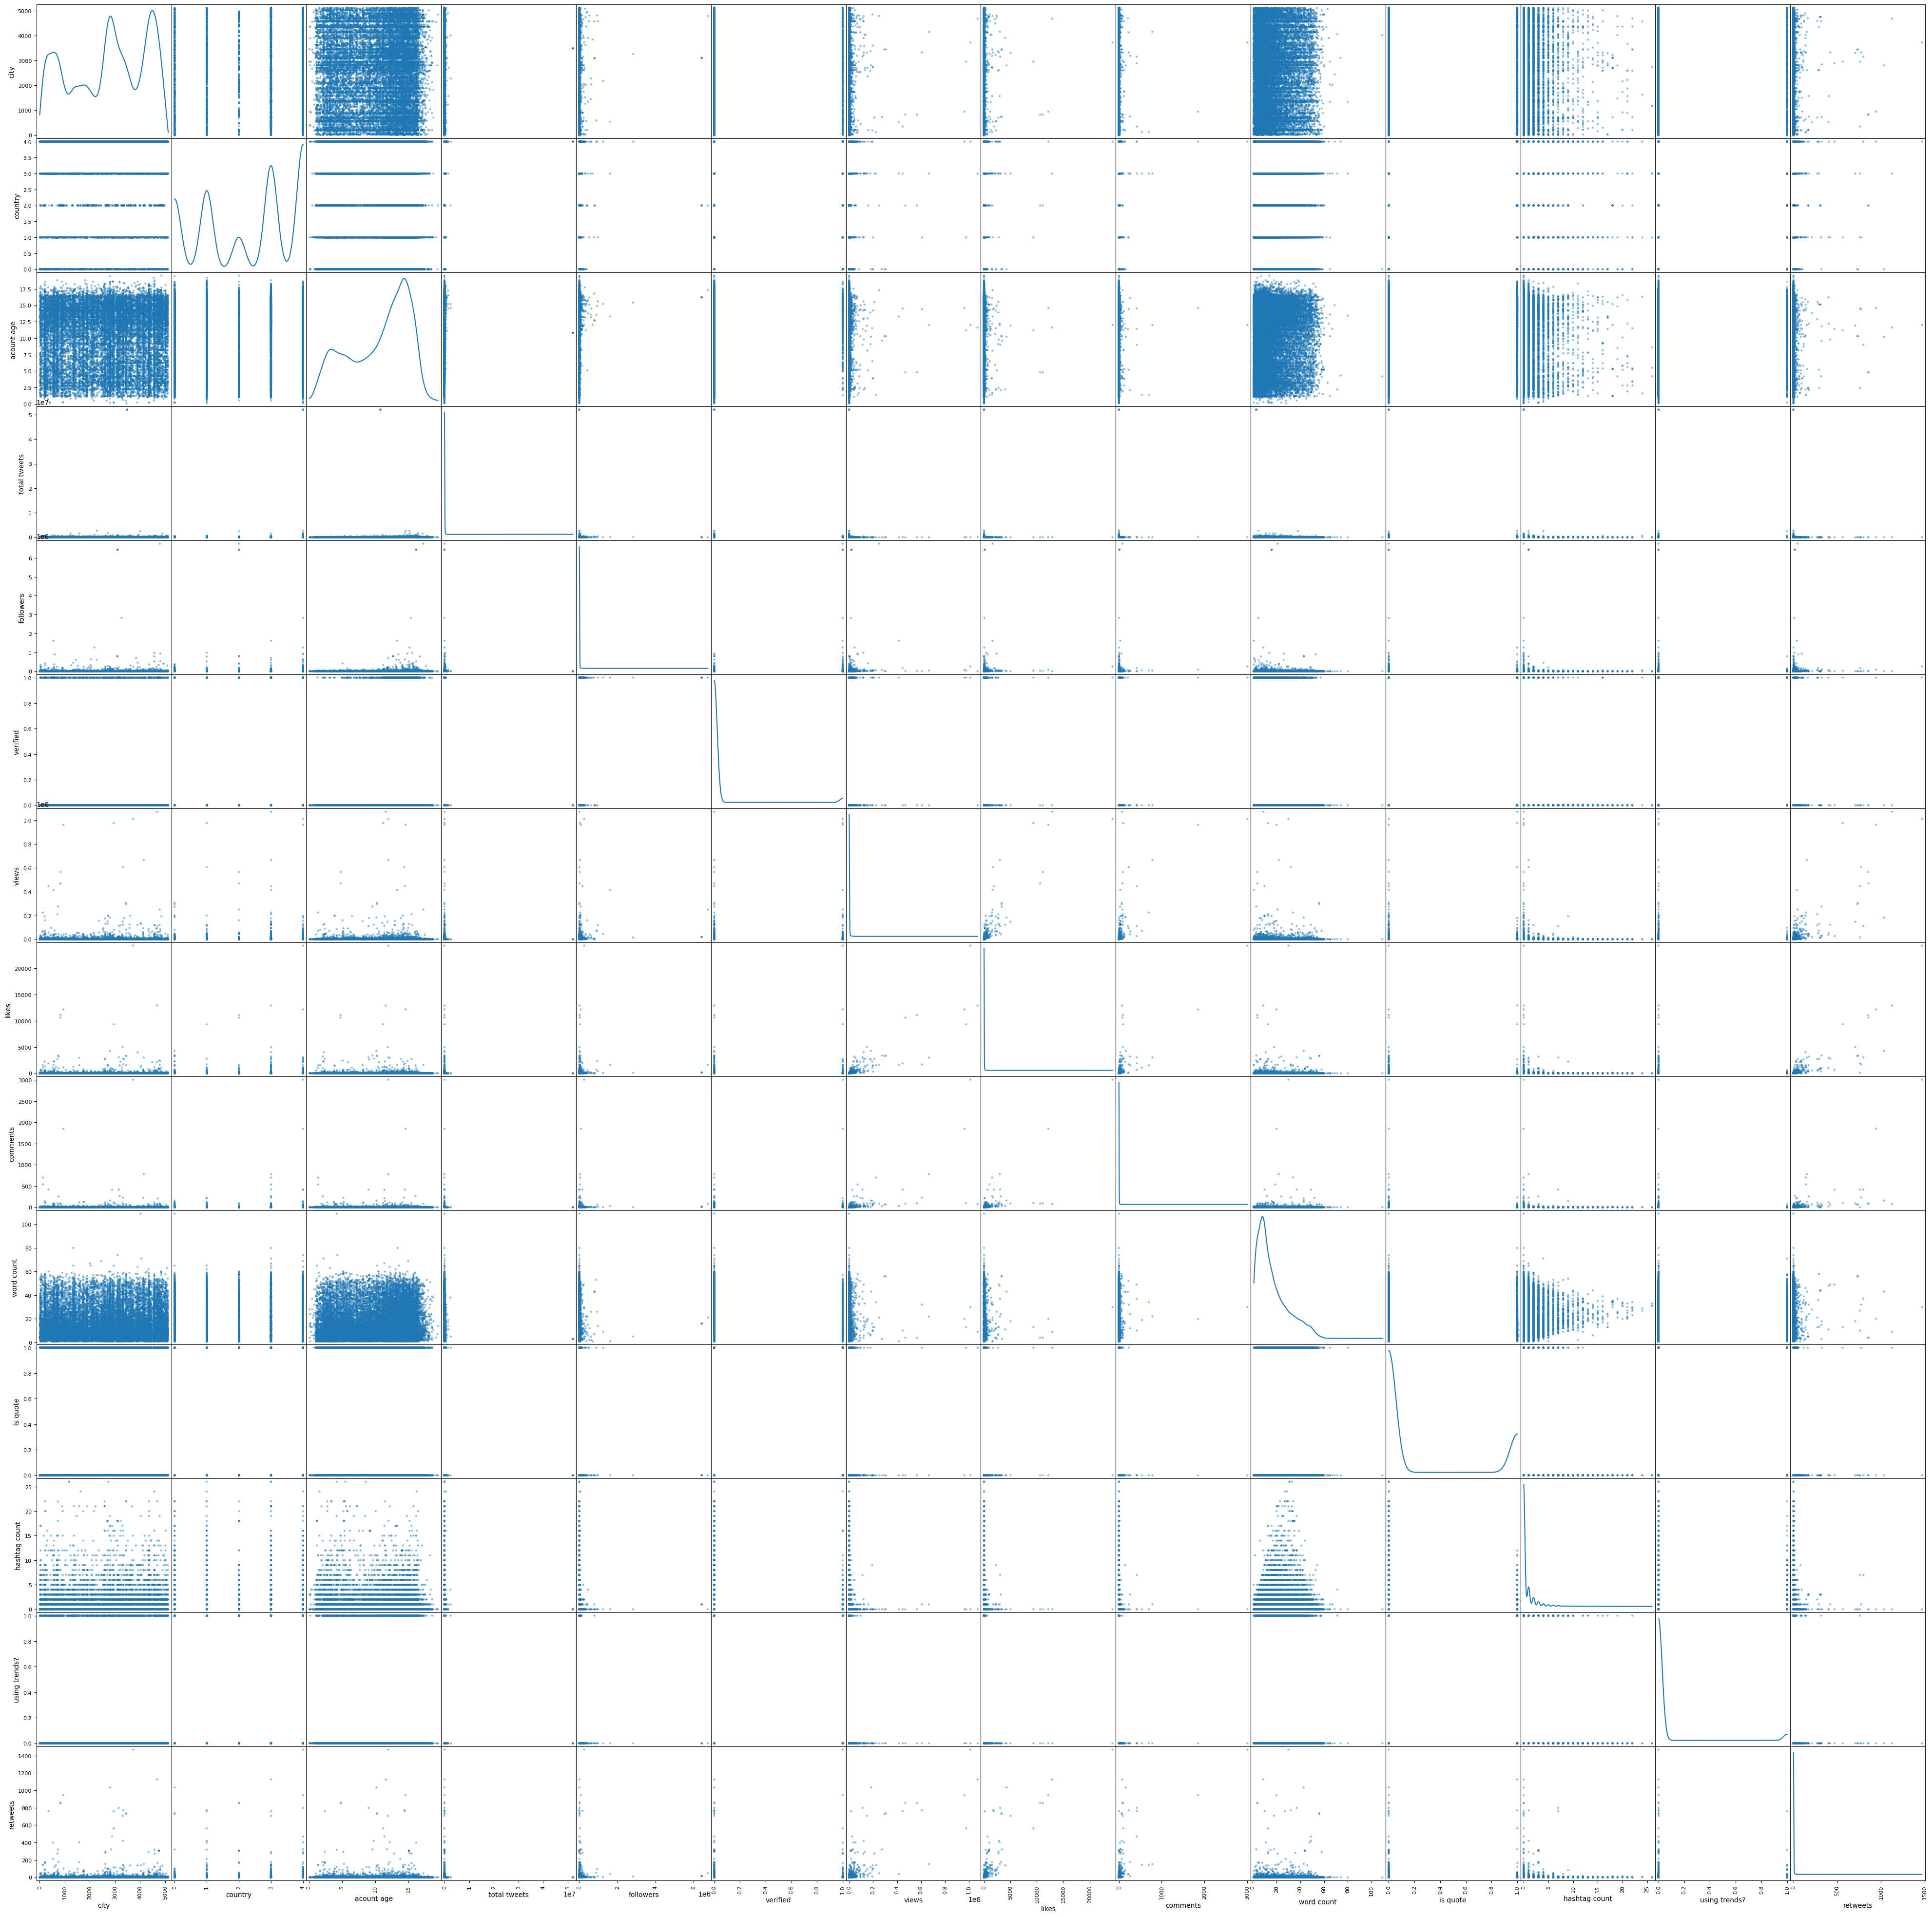

In [53]:
#print(df.corr())
pd.plotting.scatter_matrix(df, figsize=(50, 50), diagonal='kde')
plt.show()